<a href="https://colab.research.google.com/github/jeonggunlee/SleepCapstone/blob/master/SleepDataPreparation_and_Classification_ipynb%20ELU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

한림대학교 소프트웨어 융합대학
빅데이터 캡스톤 프로젝트

딥러닝에 기반한 수면 분류 모델 개발

In [34]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [35]:
cd drive/My\ Drive

[Errno 2] No such file or directory: 'drive/My Drive'
/content/drive/My Drive


In [36]:
# GPU 가용성 체크
!nvidia-smi

Sun Oct 25 07:17:44 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.23.05    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   68C    P0    32W /  70W |   1017MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [37]:
!pip install pyedflib

In [38]:
import numpy as np
from pyedflib import highlevel
import matplotlib.pyplot as plt
import os
import pandas as pd
import random
import shutil

In [39]:
def search_signals_npy(dirname):
    filenames = os.listdir(dirname)
    filenames = [file for file in filenames if file.endswith(".npy")]
    return filenames

def search_correct_signals_npy(dirname,filename):
    search_filename = filename.split('-')[0][:-2]
    file_list = os.listdir(dirname)
    filename = [file for file in file_list if search_filename in file if file.endswith("npy")]
    
    return filename

[ 4258  2762 17340  5575  7522    59]


<BarContainer object of 6 artists>

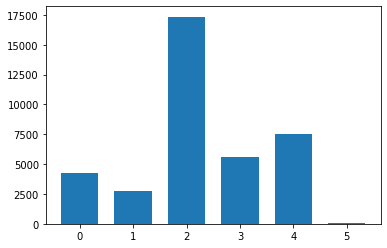

In [40]:

fs = 100                                # Sampling rate (512 Hz)
epoch_size = 30
#data = np.random.uniform(0, 100, 1024)  # 2 sec of data b/w 0.0-100.0

path =  '/content/drive/My Drive/data_2013_with_npy/origin_npy/annotations/remove_wake/'
signals_path = '/content/drive/My Drive/data_2013_with_npy/origin_npy/Fpz-Cz/remove_wake/'

annotations_npy_list = search_signals_npy(path)

total_label = np.zeros([6],dtype=int)

for filename in annotations_npy_list:
    label = np.load(path + filename)
    signals_filename = search_correct_signals_npy(signals_path,filename)[0]
    
    signals = np.load(signals_path+signals_filename)
    
    
    #print('remove start index : %d / remove end index : %d'%(remove_start_index,remove_end_index))
    #print(np.bincount(label,minlength=6))
    if len(label) !=len(signals[0])//30//fs:
        print('file is fault!!!')
    for i in range(6):
        total_label[i] += np.bincount(label,minlength=6)[i]
        
print(total_label)

x = np.arange(len(total_label))

plt.bar(x,total_label,width=0.7)

In [41]:
fs = 100                                # Sampling rate (512 Hz)
epoch_size = 30
#data = np.random.uniform(0, 100, 1024)  # 2 sec of data b/w 0.0-100.0

path =  '/content/drive/My Drive/data_2013_with_npy/origin_npy/annotations/remove_wake/'
signals_path = '/content/drive/My Drive/data_2013_with_npy/origin_npy/Fpz-Cz/remove_wake/'

annotations_npy_list = search_signals_npy(path)

print(annotations_npy_list)

random.shuffle(annotations_npy_list)

print(annotations_npy_list)

trainDataset_count = 30
testDataset_count = len(annotations_npy_list)-trainDataset_count

print(trainDataset_count)
print(testDataset_count)

train_label = np.zeros([6],dtype=int)
test_label = np.zeros([6],dtype=int)

for filename in annotations_npy_list[:trainDataset_count]:
    label = np.load(path + filename)
    
    for i in range(6):
        train_label[i] += np.bincount(label,minlength=6)[i]

        
for filename in annotations_npy_list[trainDataset_count:]:
    label = np.load(path + filename)
    
    for i in range(6):
        test_label[i] += np.bincount(label,minlength=6)[i]
        
train_label = train_label / np.sum(train_label) * 100
test_label = test_label / np.sum(test_label) * 100
print(train_label)
print(test_label)

['SC4001EC-Hypnogram.npy', 'SC4002EC-Hypnogram.npy', 'SC4032EP-Hypnogram.npy', 'SC4021EH-Hypnogram.npy', 'SC4061EC-Hypnogram.npy', 'SC4012EC-Hypnogram.npy', 'SC4041EC-Hypnogram.npy', 'SC4051EC-Hypnogram.npy', 'SC4022EJ-Hypnogram.npy', 'SC4031EC-Hypnogram.npy', 'SC4052EC-Hypnogram.npy', 'SC4042EC-Hypnogram.npy', 'SC4011EH-Hypnogram.npy', 'SC4062EC-Hypnogram.npy', 'SC4082EP-Hypnogram.npy', 'SC4081EC-Hypnogram.npy', 'SC4121EC-Hypnogram.npy', 'SC4111EC-Hypnogram.npy', 'SC4102EC-Hypnogram.npy', 'SC4112EC-Hypnogram.npy', 'SC4071EC-Hypnogram.npy', 'SC4101EC-Hypnogram.npy', 'SC4092EC-Hypnogram.npy', 'SC4091EC-Hypnogram.npy', 'SC4072EH-Hypnogram.npy', 'SC4122EV-Hypnogram.npy', 'SC4182EC-Hypnogram.npy', 'SC4152EC-Hypnogram.npy', 'SC4161EC-Hypnogram.npy', 'SC4181EC-Hypnogram.npy', 'SC4172EC-Hypnogram.npy', 'SC4131EC-Hypnogram.npy', 'SC4141EU-Hypnogram.npy', 'SC4171EU-Hypnogram.npy', 'SC4142EU-Hypnogram.npy', 'SC4151EC-Hypnogram.npy', 'SC4192EV-Hypnogram.npy', 'SC4191EP-Hypnogram.npy']
['SC4192EV-

In [42]:
signals_path = '/content/drive/My Drive/data_2013_with_npy/origin_npy/Fpz-Cz/remove_wake/'

save_train_path = '/content/drive/My Drive/data_2013_with_npy/origin_npy/Fpz-Cz/remove_wake/train/'
save_test_path = '/content/drive/My Drive/data_2013_with_npy/origin_npy/Fpz-Cz/remove_wake/test/'

os.makedirs(save_train_path,exist_ok=True)
os.makedirs(save_test_path,exist_ok=True)

for filename in annotations_npy_list[:trainDataset_count]:
    signals_filename = search_correct_signals_npy(signals_path,filename)[0]
    shutil.copy(signals_path+signals_filename,save_train_path+filename)
    

        
for filename in annotations_npy_list[trainDataset_count:]:
    signals_filename = search_correct_signals_npy(signals_path,filename)[0]
    shutil.copy(signals_path+signals_filename,save_test_path+filename)

In [43]:
def search_correct_annotations_npy(dirname,filename):
    search_filename = filename.split('-')[0][:-2]
    file_list = os.listdir(dirname)
    filename = [file for file in file_list if search_filename in file if file.endswith("npy")]
    
    return filename

train_path =  '/content/drive/My Drive/data_2013_with_npy/origin_npy/Fpz-Cz/remove_wake/train/'
test_path = '/content/drive/My Drive/data_2013_with_npy/origin_npy/Fpz-Cz/remove_wake/test/'
annotations_path = '/content/drive/My Drive/data_2013_with_npy/origin_npy/annotations/remove_wake/'

train_list = search_signals_npy(train_path)
test_list = search_signals_npy(test_path)

print(train_list)
print(test_list)

train_label = np.zeros([6],dtype=int)
test_label = np.zeros([6],dtype=int)

for filename in train_list:
    filename = search_correct_annotations_npy(annotations_path,filename)[0]
    label = np.load(annotations_path + filename)
    
    for i in range(6):
        train_label[i] += np.bincount(label,minlength=6)[i]

        
for filename in test_list:
    filename = search_correct_annotations_npy(annotations_path,filename)[0]
    label = np.load(annotations_path + filename)
    
    for i in range(6):
        test_label[i] += np.bincount(label,minlength=6)[i]
        
train_label = train_label / np.sum(train_label) * 100
test_label = test_label / np.sum(test_label) * 100
print(train_label)
print(test_label)

['SC4122EV-Hypnogram.npy', 'SC4032EP-Hypnogram.npy', 'SC4011EH-Hypnogram.npy', 'SC4091EC-Hypnogram.npy', 'SC4131EC-Hypnogram.npy', 'SC4142EU-Hypnogram.npy', 'SC4152EC-Hypnogram.npy', 'SC4102EC-Hypnogram.npy', 'SC4071EC-Hypnogram.npy', 'SC4172EC-Hypnogram.npy', 'SC4061EC-Hypnogram.npy', 'SC4092EC-Hypnogram.npy', 'SC4112EC-Hypnogram.npy', 'SC4051EC-Hypnogram.npy', 'SC4111EC-Hypnogram.npy', 'SC4171EU-Hypnogram.npy', 'SC4001EC-Hypnogram.npy', 'SC4191EP-Hypnogram.npy', 'SC4081EC-Hypnogram.npy', 'SC4121EC-Hypnogram.npy', 'SC4021EH-Hypnogram.npy', 'SC4181EC-Hypnogram.npy', 'SC4161EC-Hypnogram.npy', 'SC4052EC-Hypnogram.npy', 'SC4082EP-Hypnogram.npy', 'SC4012EC-Hypnogram.npy', 'SC4041EC-Hypnogram.npy', 'SC4062EC-Hypnogram.npy', 'SC4141EU-Hypnogram.npy', 'SC4101EC-Hypnogram.npy', 'SC4002EC-Hypnogram.npy', 'SC4151EC-Hypnogram.npy', 'SC4072EH-Hypnogram.npy', 'SC4042EC-Hypnogram.npy', 'SC4182EC-Hypnogram.npy', 'SC4192EV-Hypnogram.npy', 'SC4022EJ-Hypnogram.npy']
['SC4151EC-Hypnogram.npy', 'SC4141EU-

In [44]:
import numpy as np
import os
import time
import matplotlib.pylab as plt
from  torch.utils.data import Dataset
from torchvision import datasets, transforms
import sys
import random
import math
import warnings
import pandas as pd

from torch.utils.data import DataLoader
import torchvision.transforms as transforms
import torch
from torchsummary import summary
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [45]:
def data_preprocessing_torch(signals): # 하나의 데이터셋에 대한 data_preprocessing (using torch)
    signals = (signals - signals.mean(dim=1).unsqueeze(1))/signals.std(dim=1).unsqueeze(1)

    return signals

def data_preprocessing_oneToOne_torch(signals,min,max,max_value):
    signals_std = (signals + max_value) / (2*max_value)
    signals_scaled = signals_std * (max - min) + min
    return signals_scaled

def data_preprocessing_minmax_torch(signals,min,max):
    signals_std = (signals - signals.min(dim=1).unsqueeze(1)) / (
            signals.max(dim=1).unsqueeze(1) - signals.min(dim=1).unsqueeze(1))
    signals_scaled = signals_std * (max - min) + min
    return signals_scaled

def get_dataset_one_channel_norm_withoutCut(dirname,annotations_dir,data_path,use_noise=True,epsilon=0.5,noise_scale=2e-6,preprocessing=True,norm_methods='Standard'):
    # npy read!
    path = dirname + data_path
    signals = np.load(path)

    signals = torch.from_numpy(signals).float().to(device)

    if use_noise:
        if np.random.rand() < epsilon:
            # noise = np.random.normal(loc=0,scale=noise_scale,size=signals.shape)
            # signals = signals + noise
            noise = torch.normal(mean=0., std=noise_scale, size=signals.shape).to(device)
            signals = signals + noise

    if preprocessing:
        if norm_methods == 'Standard':
            signals = data_preprocessing_torch(signals)
        elif norm_methods == 'minmax':
            signals = data_preprocessing_minmax_torch(signals,0,1)
        elif norm_methods == 'oneToOne':
            signals = data_preprocessing_oneToOne_torch(signals,-1,1,1e-4)
    label = get_annotations(annotations_dir, data_path)
    return signals, label

# model conv layer weight init function
def weights_init(m):
    classname = m.__class__.__name__
    if classname.find('Conv') != -1:         # Conv weight init
        torch.nn.init.xavier_uniform_(m.weight.data)
        
def suffle_dataset_list(dataset_list): # 데이터 셔플
    random.shuffle(dataset_list)
    return dataset_list


# npy파일을 통해 label을 가져오는 함수
def get_annotations(label_dir,file_name):
    label_path = label_dir + file_name
    label = np.load(label_path)
    return label

def signals_expand_torch_one_channel(signals): # 2차원 데이터를 3차원으로 변환 (8,N) -> (batch,8,6000) 형태로
    signals = signals.expand(1,1,-1)
    #print(signals.shape)
    signals = signals.transpose(2, 1) # 차원 변경
    signals = signals.reshape(-1, 3000, 1) # 형태 변환
    signals = signals.transpose(2, 1) # 차원 변경
    return signals

In [50]:
class DeepSleepNet_Classification(nn.Module):  # input channel = 8channel / output = 5
    def __init__(self,in_channel=1,out_channel=6,layer=[64,128,128,128],sample_rate = 100):
        super(DeepSleepNet_Classification, self).__init__()

        
        self.fc1 = nn.Linear(3000,1024)
        self.fc2 = nn.Linear(1024,1024)
        self.fc3 = nn.Linear(1024,512)
        self.fc4 = nn.Linear(512, 256)
        self.fc5 = nn.Linear(256, out_channel)

        self.ELU = nn.ELU()
        

    def forward(self, input):
        # print("feature_extract_2d.shape : ", feature_extract_2d.shape)
        # 여기서 문제 발생 weight의 경우에는 [64 , 32 , 100] 이지만 input 이 2차원 [32, 750]이라 문제 발생!
        out = torch.flatten(input, 1)
        out = self.fc1(out)
        out = self.ELU(out)
        out = self.fc2(out)
        out = self.ELU(out)
        out = self.fc3(out)
        out = self.ELU(out)
        out = self.fc4(out)
        out = self.ELU(out)
        out = self.fc5(out)

        return out

In [51]:
model = DeepSleepNet_Classification(in_channel=1,out_channel=6)
summary(model.cuda(),(1,3000))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                 [-1, 1024]       3,073,024
               ELU-2                 [-1, 1024]               0
            Linear-3                 [-1, 1024]       1,049,600
               ELU-4                 [-1, 1024]               0
            Linear-5                  [-1, 512]         524,800
               ELU-6                  [-1, 512]               0
            Linear-7                  [-1, 256]         131,328
               ELU-8                  [-1, 256]               0
            Linear-9                    [-1, 6]           1,542
Total params: 4,780,294
Trainable params: 4,780,294
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.01
Forward/backward pass size (MB): 0.04
Params size (MB): 18.24
Estimated Total Size (MB): 18.29
-------------------------------------

In [52]:
def search_npy_list(dirname):  # 매개변수 dir에서 모든 npy파일을 찾고 fold에 따른 dataset 나누기
    filenames = os.listdir(dirname)
    filenames = [file for _, file in enumerate(filenames) if file.endswith(".npy")]
    return filenames


In [53]:
def train_model_withNoise_norm(save_filename,logging_filename,train_signal_dir, test_signal_dir,annotations_dir
                               ,epochs=2000,learning_rate=0.001,step_size=100,gamma=0.5,channel=0,
                               layer_filters=[64,128,256,512],first_conv=[200,40,100],optim='Adam',lf='CE',
                               epsilon=0.7,noise_scale=2e-6,min_value=-1e-4,max_value=1e-4,preprocessing=True,
                               norm_methods='Standard',use_noise=True,loss_type='softmax'):
    # Adam optimizer param
    b1 = 0.5
    b2 = 0.999

    beta = 0.001

    check_file = open(logging_filename, 'w')  # logging file

    print('Preproceesing  : ',preprocessing)
    print('min/max value : %f/%f'%(min_value,max_value))
    print('noise scale : ',noise_scale)
    print('loss function : ',lf)
    print('epsilon : ',epsilon)
    print('norm methods : ',norm_methods)

    print('logging file name : ', logging_filename)
    print('save file name : ', save_filename)
    print('layer filters : ',layer_filters)
    print('fisrt_conv info : ',first_conv)
    print('loss type : ',loss_type)
    print('training data oversampling noise : ',use_noise)
    best_accuracy = 0.
    best_epoch = 0

    train_dataset_list = search_npy_list(train_signal_dir)
    test_dataset_list = search_npy_list(test_signal_dir)

    train_dataset_len = len(train_dataset_list)
    test_dataset_len = len(test_dataset_list)

    print('train_dataset length : ', len(train_dataset_list))
    print(train_dataset_list)

    print('test_dataset length : ',test_dataset_len)
    print(test_dataset_list)


    model = DeepSleepNet_Classification()

    #model = resnet18_200hz(in_channel=1,layer_filters=layer_filters,first_conv=first_conv,use_batchnorm=True,num_classes=5)

    model.apply(weights_init) # weight init

    cuda = torch.cuda.is_available()

    if cuda:
        print('can use CUDA!!!')
        model = model.cuda()
    #summary(model,[1,6000])
    print('torch.cuda.device_count() : ', torch.cuda.device_count())
    if torch.cuda.device_count() > 1:
        print('Multi GPU Activation !!!')
        #model = nn.DataParallel(model)

    # loss funcition
    if lf == 'CE':
        loss_fn = nn.CrossEntropyLoss().to(device)
    elif lf == 'CEW':
        samples_per_cls = [27,15,41,5,11]
        no_of_classes = 5
        effective_num = 1.0 - np.power(beta,samples_per_cls)
        #print(effective_num)
        weights = (1.0 - beta) / np.array(effective_num)
        #print(weights)
        weights = weights / np.sum(weights) * no_of_classes
        weights = torch.tensor(weights).float()
        weights = weights.to(device)
        loss_fn = nn.CrossEntropyLoss(weight=weights).to(device)
    elif lf == 'FL':
        loss_fn = FocalLoss(gamma=2).to(device)
    elif lf == 'CBL':
        loss_fn = CB_loss(samples_per_cls=[27,15,41,5,11],no_of_classes=5,loss_type=loss_type,beta=0.9999,gamma=2.0)
    #loss_fn = FocalLoss(gamma=2).to(device)

    # optimizer ADAM (SGD의 경우에는 정상적으로 학습이 진행되지 않았음)
    if optim == 'Adam':
        print('Optimizer : Adam')
        optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, betas=(b1, b2))
    elif optim == 'RMS':
        print('Optimizer : RMSprop')
        optimizer = torch.optim.RMSprop(model.parameters(), lr=learning_rate)
    elif optim == 'SGD':
        print('Optimizer : SGD')
        optimizer = torch.optim.SGD(model.parameters(),lr=learning_rate,momentum=0.9)

    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer=optimizer, mode='min', factor=gamma, patience=10,
                                                           min_lr=1e-6)
    #stride = 40 일 때, batch_size = 20이면 16GB정도의 메모리 사용
    batch_size = 5
    norm_square = 2

    train_batch_size = math.ceil(train_dataset_len / batch_size)
    print('train_batch_size : ',train_batch_size)

    test_batch_size = test_dataset_len

    best_accuracy = 0.
    stop_count = 0
    for epoch in range(epochs):
        train_dataset = suffle_dataset_list(train_dataset_list) # 매 epoch마다 train_dataset shuffle !
        count = 0  # check batch
        train_total_loss = 0.0
        train_total_count = 0
        train_total_data = 0

        val_total_loss = 0.0
        val_total_count = 0
        val_total_data = 0

        test_total_loss = 0.0
        test_total_count = 0
        test_total_data = 0

        start_time = time.time()
        model.train()

        output_str = 'current_lr : %f\n'%(optimizer.state_dict()['param_groups'][0]['lr'])
        sys.stdout.write(output_str)
        check_file.write(output_str)
        for index, file_name in enumerate(train_dataset):
            #print('index : ',index)
            if index % batch_size == 0:
                batch_signal, batch_label = get_dataset_one_channel_norm_withoutCut(train_signal_dir,annotations_dir,file_name,
                                                                         use_noise=use_noise,epsilon=epsilon,noise_scale=noise_scale,
                                                                         preprocessing=preprocessing,norm_methods=norm_methods)
            else:
                new_signal, new_label = get_dataset_one_channel_norm_withoutCut(train_signal_dir,annotations_dir,file_name,
                                                                         use_noise=use_noise,epsilon=epsilon,noise_scale=noise_scale,
                                                                         preprocessing=preprocessing,norm_methods=norm_methods)

                batch_signal = torch.cat((batch_signal, new_signal),dim=1)
                batch_label = np.concatenate((batch_label, new_label))
            count += 1
            if count == batch_size or index == len(train_dataset) - 1:  # batch 학습 시작!
                batch_signal = signals_expand_torch_one_channel(batch_signal)
                #batch_signal = signals_expand_torch_one_channel(batch_signal)
                # batch_signal = torch.from_numpy(batch_signal).float().to(device)
                batch_label = torch.from_numpy(batch_label).long().to(device)
                optimizer.zero_grad()
                # print(batch_signal.shape)
                # print(batch_signal)
                pred = model(batch_signal)
                norm = 0

                for parameter in model.parameters():
                    norm += torch.norm(parameter, p=norm_square)

                loss = loss_fn(pred, batch_label) + beta * norm
                #print('loss : ',loss.item())
                # loss = loss_fn(pred, batch_label)
                # acc
                _, predict = torch.max(pred, 1)
                check_count = (predict == batch_label).sum().item()

                train_total_loss += loss.item()

                train_total_count += check_count
                train_total_data += len(batch_signal)
                loss.backward()
                optimizer.step()

                del (batch_signal)
                del (batch_label)
                del (loss)
                del (pred)
                torch.cuda.empty_cache()
                count = 0

        train_total_loss /= train_batch_size
        train_accuracy = train_total_count / train_total_data * 100

        output_str = 'train dataset : %d/%d epochs spend time : %.4f sec / total_loss : %.4f correct : %d/%d -> %.4f%%\n' \
                     % (epoch + 1, epochs, time.time() - start_time, train_total_loss,
                        train_total_count, train_total_data, train_accuracy)
        sys.stdout.write(output_str)
        check_file.write(output_str)

    

        #check test dataset
        start_time = time.time()
        for file_name in test_dataset_list:
            batch_signal, batch_label = get_dataset_one_channel_norm_withoutCut(test_signal_dir,annotations_dir,file_name,
                                                                         use_noise=False,epsilon=epsilon,noise_scale=noise_scale,
                                                                         preprocessing=preprocessing,norm_methods=norm_methods)

            batch_signal = signals_expand_torch_one_channel(batch_signal)

            batch_label = torch.from_numpy(batch_label).long().to(device)

            with torch.no_grad():
                pred = model(batch_signal)

                loss = loss_fn(pred, batch_label)

                # acc
                _, predict = torch.max(pred, 1)
                check_count = (predict == batch_label).sum().item()

                test_total_loss += loss.item()
                test_total_count += check_count
                test_total_data += len(batch_signal)

                # 사용하지 않는 변수 제거
                del (batch_signal)
                del (batch_label)
                del (loss)
                del (pred)
                torch.cuda.empty_cache()
        test_total_loss /= test_batch_size
        test_accuracy = test_total_count / test_total_data * 100



        output_str = 'test dataset : %d/%d epochs spend time : %.4f sec  / total_loss : %.4f correct : %d/%d -> %.4f%%\n' \
                     % (epoch + 1, epochs, time.time() - start_time, test_total_loss,
                        test_total_count, test_total_data, test_accuracy)
        sys.stdout.write(output_str)
        check_file.write(output_str)

        scheduler.step(float(test_total_loss))
        #scheduler.step()

        if epoch == 0:
            best_accuracy = test_accuracy
            best_epoch = epoch
            save_file = save_filename
            #save_file = save_path + 'best_SleepEEGNet_CNN_channel%d.pth'%channel
            torch.save(model.state_dict(),save_file)
            stop_count = 0
        else:
            if best_accuracy < test_accuracy:
                best_accuracy = test_accuracy
                best_epoch = epoch
                save_file = save_filename
                torch.save(model.state_dict(), save_file)
                stop_count = 0
            else:
                stop_count += 1
        if stop_count > 30:
            print('Early Stopping')
            break

        output_str = 'best epoch : %d/%d / val accuracy : %f%%\n' \
                     % (best_epoch+1, epochs, best_accuracy)
        sys.stdout.write(output_str)
        print('=' * 30)


    output_str = 'best epoch : %d/%d / accuracy : %f%%\n' \
                 % (best_epoch+1, epochs, best_accuracy)
    sys.stdout.write(output_str)
    check_file.write(output_str)
    print('=' * 30)

    check_file.close()

In [54]:
save_filename = './train.pth'
logging_filename = './logging.txt'
train_signal_dir = '/content/drive/My Drive/data_2013_with_npy/origin_npy/Fpz-Cz/remove_wake/train/'
test_signal_dir = '/content/drive/My Drive/data_2013_with_npy/origin_npy/Fpz-Cz/remove_wake/test/'
annotations_dir = '/content/drive/My Drive/data_2013_with_npy/origin_npy/annotations/remove_wake/'
train_model_withNoise_norm(save_filename,logging_filename,train_signal_dir, 
                           test_signal_dir,annotations_dir,
                           epochs=2000,learning_rate=0.001,step_size=100,gamma=0.5,channel=0,
                           layer_filters=[64,128,256,512],first_conv=[200,40,100],
                           optim='Adam',lf='CE',epsilon=0,noise_scale=0,
                           min_value=-0,max_value=0,preprocessing=True,
                           norm_methods='Standard',use_noise=False,loss_type='softmax')

Preproceesing  :  True
min/max value : 0.000000/0.000000
noise scale :  0
loss function :  CE
epsilon :  0
norm methods :  Standard
logging file name :  ./logging.txt
save file name :  ./train.pth
layer filters :  [64, 128, 256, 512]
fisrt_conv info :  [200, 40, 100]
loss type :  softmax
training data oversampling noise :  False
train_dataset length :  37
['SC4122EV-Hypnogram.npy', 'SC4032EP-Hypnogram.npy', 'SC4011EH-Hypnogram.npy', 'SC4091EC-Hypnogram.npy', 'SC4131EC-Hypnogram.npy', 'SC4142EU-Hypnogram.npy', 'SC4152EC-Hypnogram.npy', 'SC4102EC-Hypnogram.npy', 'SC4071EC-Hypnogram.npy', 'SC4172EC-Hypnogram.npy', 'SC4061EC-Hypnogram.npy', 'SC4092EC-Hypnogram.npy', 'SC4112EC-Hypnogram.npy', 'SC4051EC-Hypnogram.npy', 'SC4111EC-Hypnogram.npy', 'SC4171EU-Hypnogram.npy', 'SC4001EC-Hypnogram.npy', 'SC4191EP-Hypnogram.npy', 'SC4081EC-Hypnogram.npy', 'SC4121EC-Hypnogram.npy', 'SC4021EH-Hypnogram.npy', 'SC4181EC-Hypnogram.npy', 'SC4161EC-Hypnogram.npy', 'SC4052EC-Hypnogram.npy', 'SC4082EP-Hypnogr